## Regression

Question 1

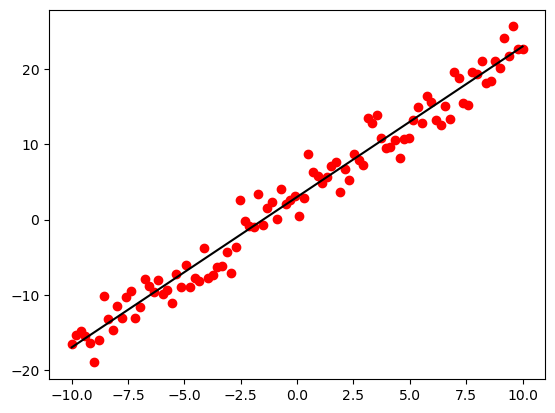

In [4]:
import numpy as np
import matplotlib.pyplot as plt
a = 2
b = 3
x = np.linspace(-10,10,100)
y = []


ydata = []
x.shape
y = a*x + b
sigma = 2
ynew = a*x + b + np.random.normal(0,sigma,x.shape[0])
plt.plot(x,y,color = "black")
plt.scatter(x,ynew,color="red")


Question 2

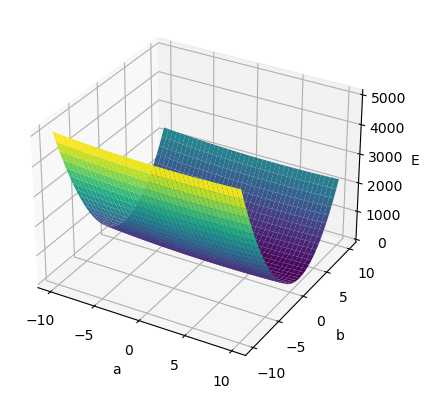

In [5]:
def avg_error(a, b, x, y):
    return np.mean((y - (a * x + b)) ** 2)

a = np.arange(-10, 10.1, 0.1)
b = np.arange(-10, 10.1, 0.1)
A, B = np.meshgrid(a, b)
C = np.zeros((len(a), len(b)))

for i in range(len(a)):
    for j in range(len(b)):
        C[i, j] = avg_error(a[i], b[j], x, y)
       
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, C, cmap='viridis')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')
plt.show()


Question 3

MSE: 0.8522610873357204
R-squared: 0.9752829260561945


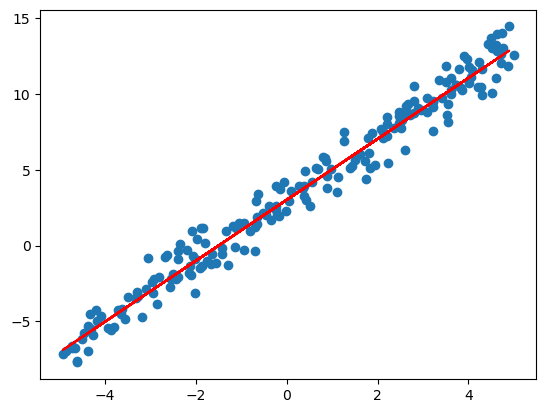

MSE: 8.738646741632587
R-squared: 0.8228183760245347


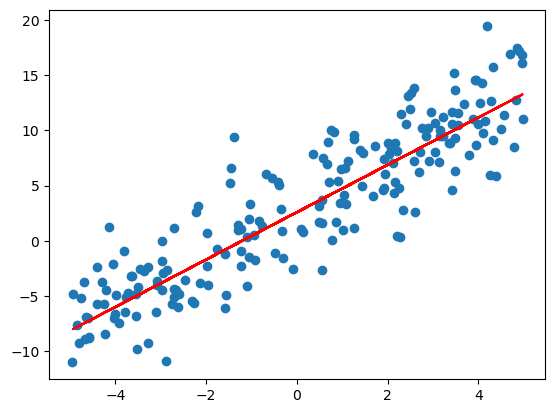

MSE: 32.80244339606185
R-squared: 0.570747497906549


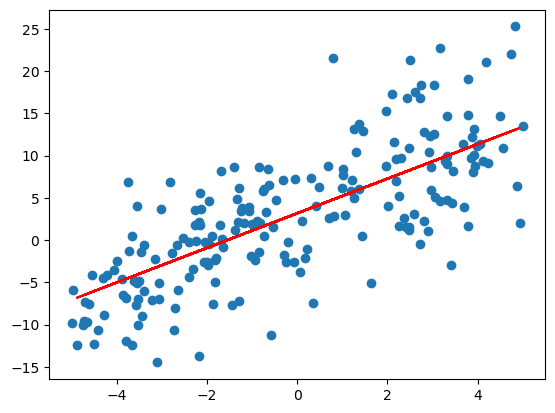

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate 200 data points
def generate_data(a, b, x_range, sigma, size=200):
    x = np.random.uniform(*x_range, size=size)
    noise = np.random.normal(0, sigma, size=size)
    y = a*x + b + noise
    return x, y

# Compute the pseudo-inverse
def estimate_coefs(X, y):
    X_pinv = np.linalg.pinv(X)
    coefs = np.dot(X_pinv, y)
    return coefs

# Compute MSE and R-squared
def evaluate_model(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    return mse, r2

a, b = 2, 3
x_range = (-5, 5)
sigma = 1
x, y = generate_data(a, b, x_range, sigma)

X = np.c_[np.ones(len(x)), x]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=100)

coefs = estimate_coefs(x_train, y_train)
y_pred = np.dot(x_test, coefs)
mse, r2 = evaluate_model(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

plt.scatter(x, y)
plt.plot(x_test[:, 1], y_pred, color='red')
plt.show()


sigma = 3
x, y = generate_data(a, b, x_range, sigma)

X = np.c_[np.ones(len(x)), x]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=100)

coefs = estimate_coefs(x_train, y_train)
y_pred = np.dot(x_test, coefs)
mse, r2 = evaluate_model(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

plt.scatter(x, y)
plt.plot(x_test[:, 1], y_pred, color='red')
plt.show()

sigma = 5
x, y = generate_data(a, b, x_range, sigma)

X = np.c_[np.ones(len(x)), x]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=100)

coefs = estimate_coefs(x_train, y_train)
y_pred = np.dot(x_test, coefs)
mse, r2 = evaluate_model(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

plt.scatter(x, y)
plt.plot(x_test[:, 1], y_pred, color='red')
plt.show()


Observation: As the sigma value increases, the points scatter away from regression line, resulting in increase of Mean Squared Error and R-Squared Value.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.model_selection import train_test_split


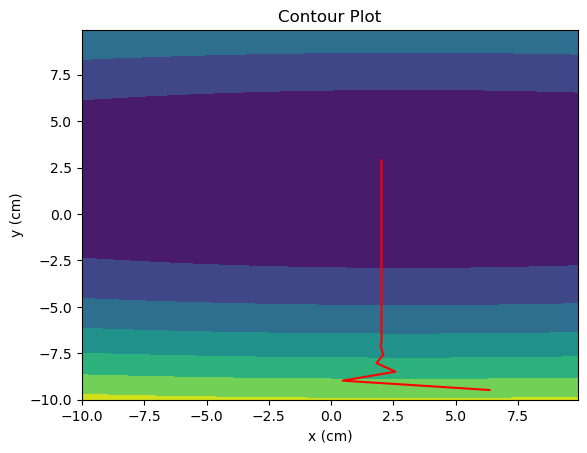

In [15]:
from re import T
a=np.linspace(-10,10,200)
b=np.linspace(-10,10,200)
x=np.linspace(-10,10,100)
y1=[2*x[i] +3 + sig*noise[i] for i in range(100) ]
y_hat=np.zeros(100)
err=np.zeros((200,200))
err_mean=np.zeros(200)

for i in range(len(a)):
  for j in range(len(b)):
    y_hat=a[i]*x+b[j]
    err[i][j]=((y1-y_hat)**2).mean()
    
x1=np.linspace(-10,10,100)
sig=2
noise=np.random.randn(100)
y1=np.array([2*x1[i] +3 + sig*noise[i] for i in range(100) ])


y=np.transpose(y1)
def gradient1(A,P,y):
  gradE= -2*(np.dot(np.transpose(A),y)) +2*(np.dot(np.dot(np.transpose(A),A),P))
  return gradE
P1=np.array([-10,-10])
P2=np.transpose(np.array([-5,-5]))
P3=np.transpose(np.array([0,0]))
P4=np.transpose(np.array([5,5]))
P5=np.transpose(np.array([10,10]))
A=np.ones((100,2))
for i in range(len(x)):
  A[i][0]=x[i]
def soln(eta,A,P,y):
  B=[]
  for i in range(100):
    P=P-eta*gradient1(A,P,y)
    B.append(P)
  return P,B

(P,B)=(soln(.0002,A,P1,y))
B=np.array(B)


a=np.arange(-10.0, 10.0 ,0.1)
b=np.arange(-10.0, 10.0 ,0.1)
a,b=np.meshgrid(a,b)


plt.contourf(a ,b, err)
plt.plot(B[:,0],B[:,1],color='red')

plt.title('Contour Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

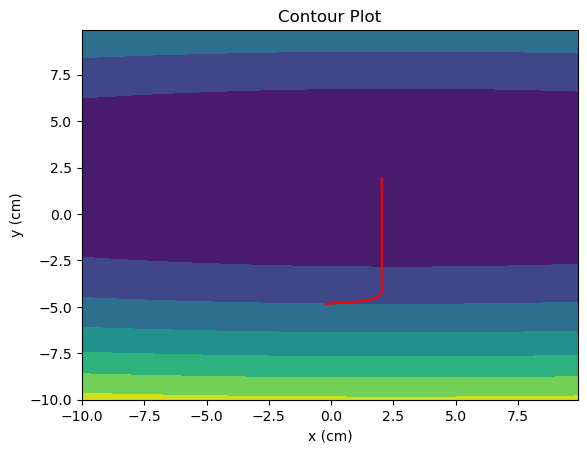

In [10]:
(P,B)=(soln(.0001,A,P2,y))
B=np.array(B)

a=np.arange(-10.0, 10.0 ,0.1)
b=np.arange(-10.0, 10.0 ,0.1)
a,b=np.meshgrid(a,b)


plt.contourf(a ,b, err)
plt.plot(B[:,0],B[:,1],color='red')
# plt.colorbar(cp)
# plt.grid()
plt.title('Contour Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()


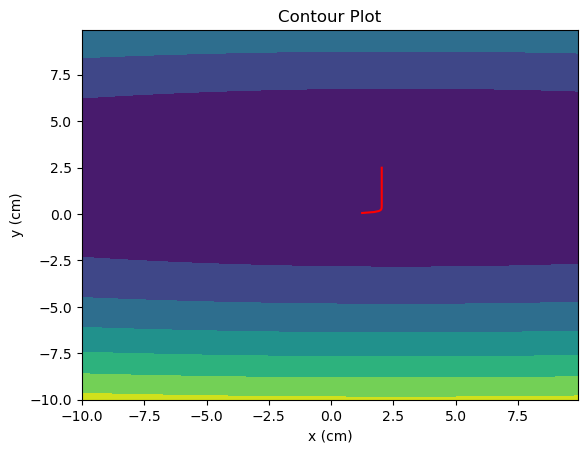

In [11]:
(P,B)=(soln(.00009,A,P3,y))
B=np.array(B)


a=np.arange(-10.0, 10.0 ,0.1)
b=np.arange(-10.0, 10.0 ,0.1)
a,b=np.meshgrid(a,b)


plt.contourf(a ,b, err)
plt.plot(B[:,0],B[:,1],color='red')
# plt.colorbar(cp)
# plt.grid()
plt.title('Contour Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

